In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['figure.dpi'] = 500 # Resolution of figures
plt.rcParams["figure.autolayout"] = True
plt.rcParams["legend.loc"] = 'best'
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18

#### Visualizing performance of the "add then concatenate" model on a test set of reactions extracted from a total of 139,215 reactions

In [2]:
model_type = 'XGBoost'
max_species = 4
cofactor_configuration = 'add_concat'

In [3]:
DORA_XGB_test_results_filepath = f'../../models/performance_results/all_BKM_rxns_ecfp4_{model_type}_{max_species}_{cofactor_configuration}_test_performance_results.json'


In [4]:
with open(DORA_XGB_test_results_filepath,'r') as file:
    DORA_XGB_test_results_dict = json.load(file)

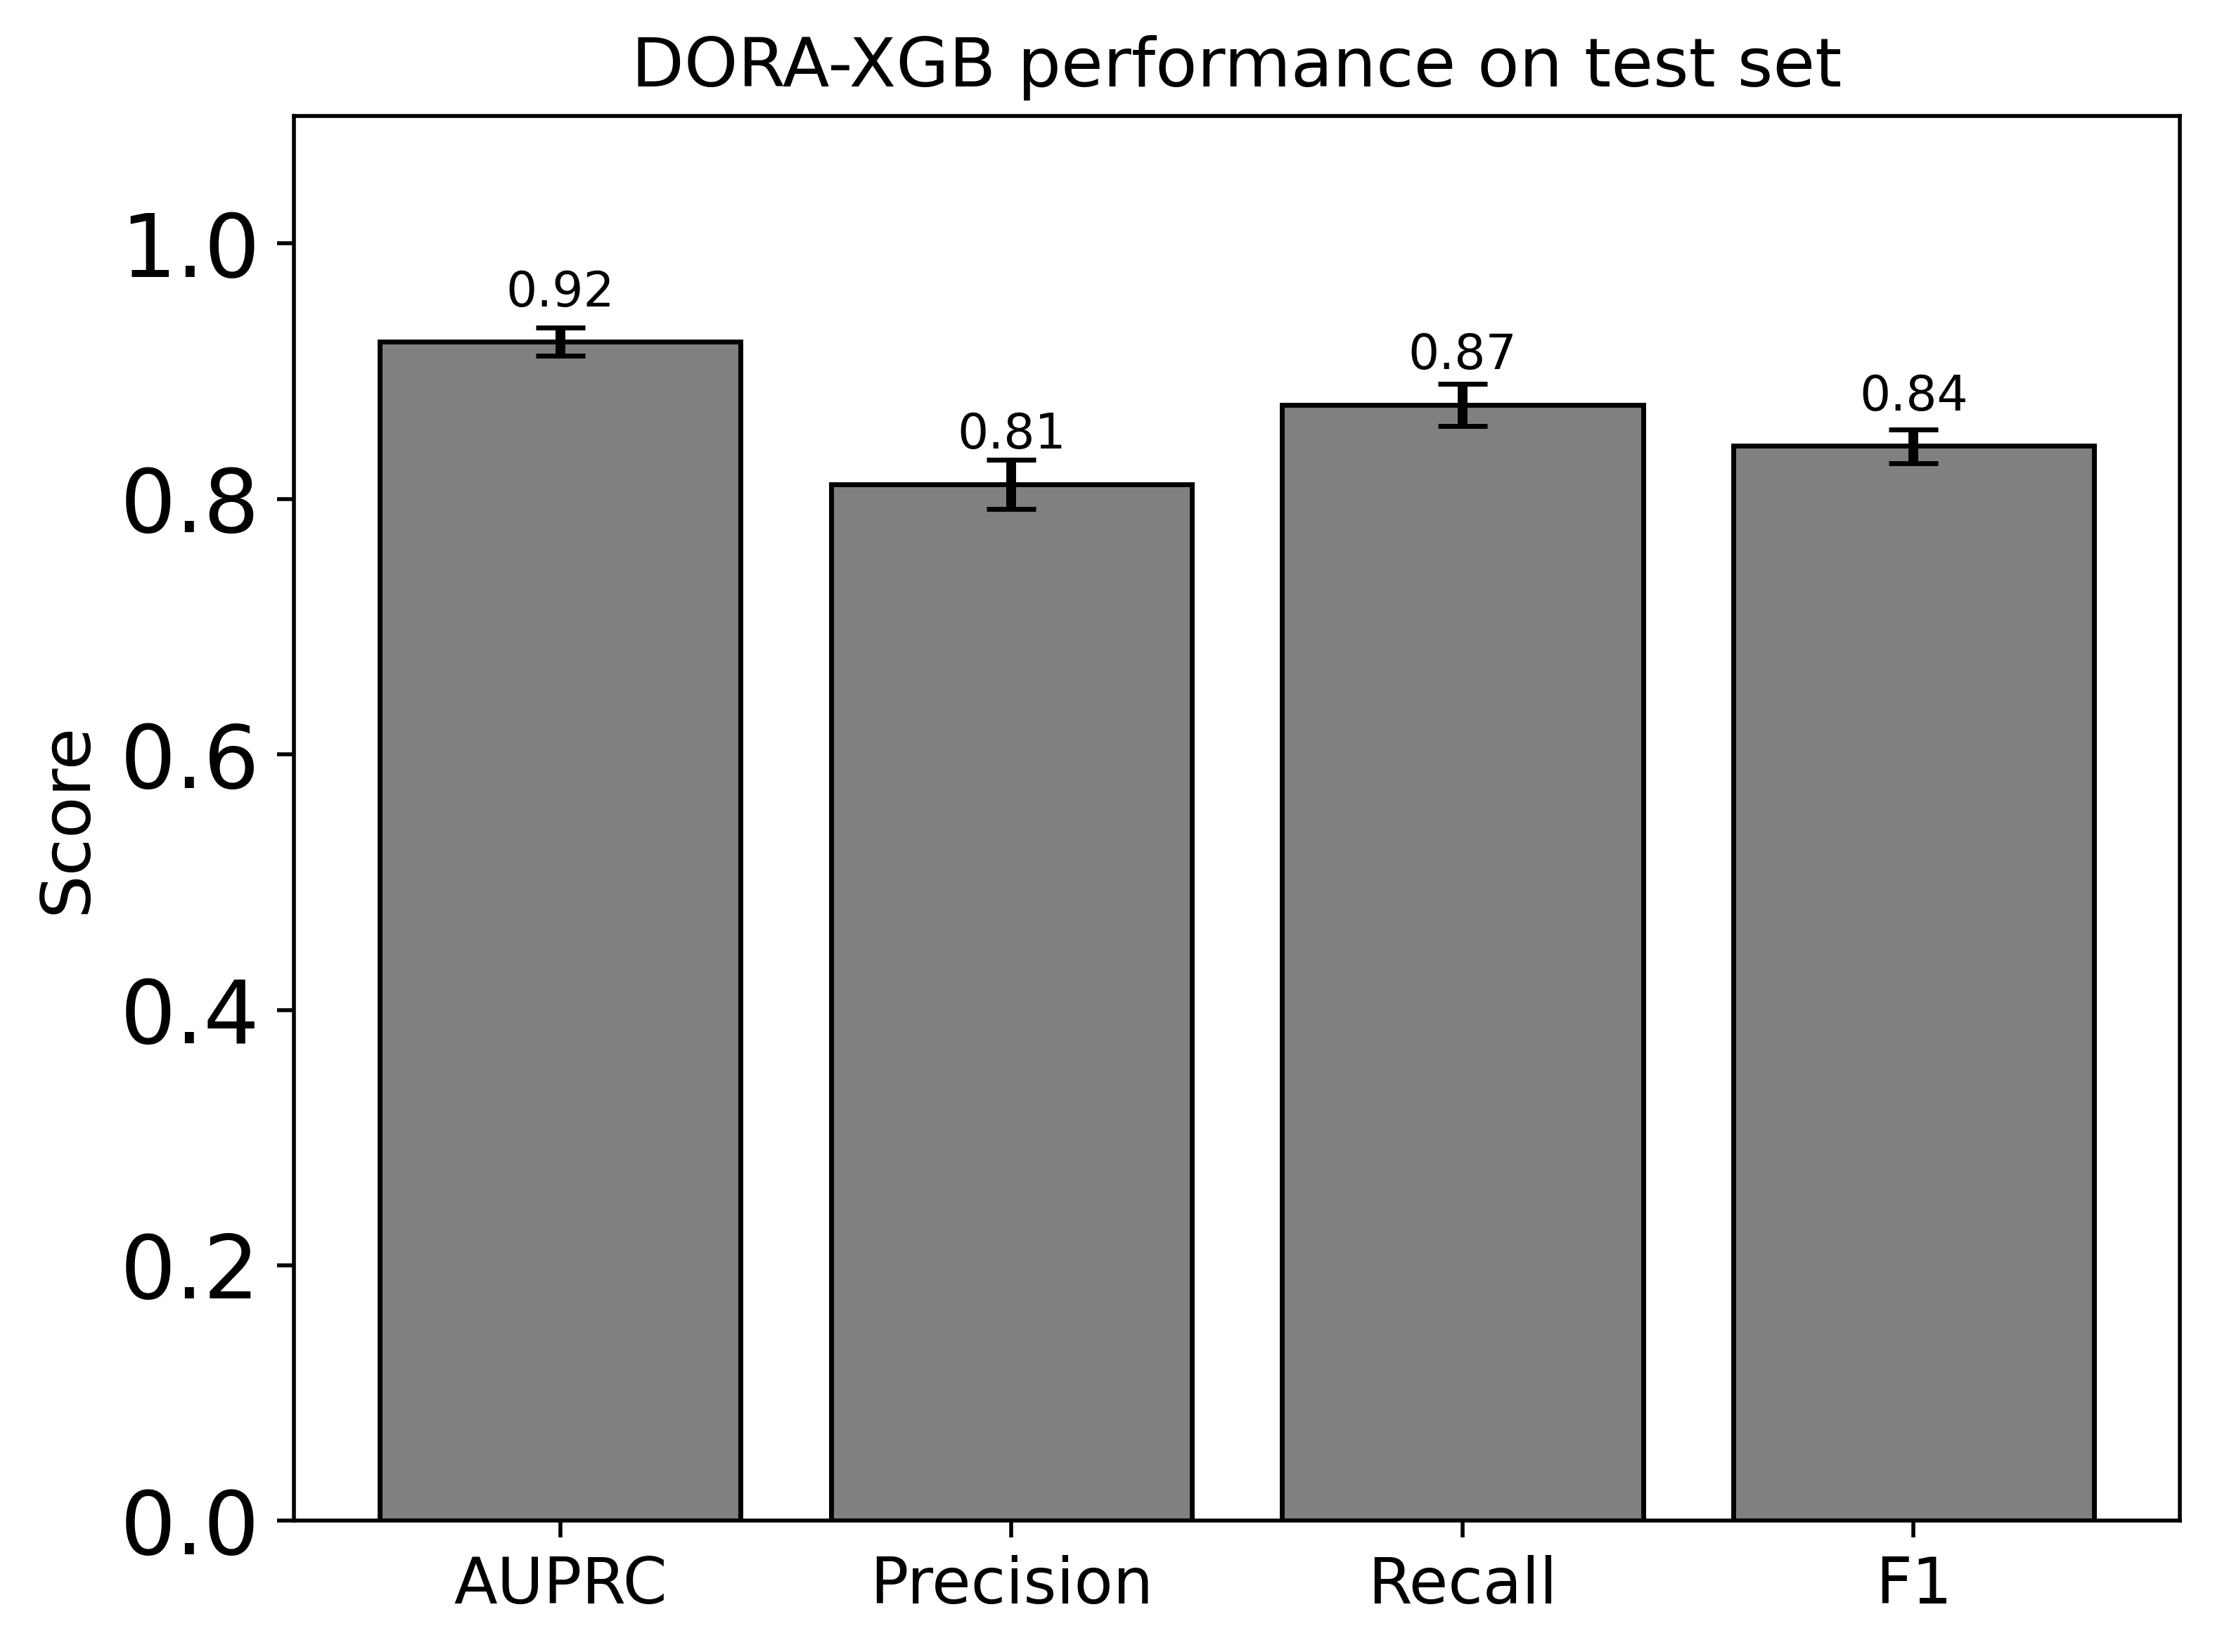

In [5]:
categories = ['AUPRC', 'Precision', 'Recall', 'F1']

# mean scores
scores = [DORA_XGB_test_results_dict[f'mean {cat}'] for cat in categories] 

# error bars (upper and lower CI)
lower_errors = [DORA_XGB_test_results_dict[f'{cat} lower CI'] for cat in categories]
upper_errors = [DORA_XGB_test_results_dict[f'{cat} upper CI'] for cat in categories]
errors = [ [scores[i] - lower_errors[i], upper_errors[i] - scores[i]] for i in range(len(categories)) ]

# convert to numpy array for error bars
errors = np.array(errors).T

fig, ax = plt.subplots()

# Plot bars with error bars
bars = ax.bar(categories, scores, yerr=errors, capsize=5, color='gray', edgecolor='black')

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

ax.set_ylabel('Score',fontsize = 14)
ax.set_title('DORA-XGB performance on test set',fontsize = 14)
ax.set_ylim(0, 1.1)

ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(categories, fontsize=13)

plt.savefig('main_fig4.png')
plt.show()

#### Visualizing performance of models trained on all 6 configurations against a test set of reactions extracted from a total of 139,215 reactions

In [6]:
DORA_XGB_by_ascending_MW_results_filepath = f'../../models/performance_results/all_BKM_rxns_ecfp4_{model_type}_{max_species}_by_ascending_MW_test_performance_results.json'

with open(DORA_XGB_by_ascending_MW_results_filepath, 'r') as file:
    DORA_XGB_by_ascending_MW_test_results_dict = json.load(file)

DORA_XGB_by_descending_MW_results_filepath = f'../../models/performance_results/all_BKM_rxns_ecfp4_{model_type}_{max_species}_by_descending_MW_test_performance_results.json'

with open(DORA_XGB_by_descending_MW_results_filepath, 'r') as file:
    DORA_XGB_by_descending_MW_test_results_dict = json.load(file)    
    
DORA_XGB_add_concat_test_results_filepath = f'../../models/performance_results/all_BKM_rxns_ecfp4_{model_type}_{max_species}_add_concat_test_performance_results.json'

with open(DORA_XGB_add_concat_test_results_filepath, 'r') as file:
    DORA_XGB_add_concat_test_results_dict = json.load(file)
    
DORA_XGB_add_subtract_test_results_filepath = f'../../models/performance_results/all_BKM_rxns_ecfp4_{model_type}_{max_species}_add_subtract_test_performance_results.json'

with open(DORA_XGB_add_subtract_test_results_filepath, 'r') as file:
    DORA_XGB_add_subtract_test_results_dict = json.load(file)
    
DORA_XGB_half_random_test_results_filepath = f'../../models/performance_results/all_BKM_rxns_ecfp4_{model_type}_{max_species}_half_random_test_performance_results.json'

with open(DORA_XGB_half_random_test_results_filepath, 'r') as file:
    DORA_XGB_half_random_test_results_dict = json.load(file)
    
DORA_XGB_full_random_test_results_filepath = f'../../models/performance_results/all_BKM_rxns_ecfp4_{model_type}_{max_species}_full_random_test_performance_results.json'

with open(DORA_XGB_full_random_test_results_filepath, 'r') as file:
    DORA_XGB_full_random_test_results_dict = json.load(file)

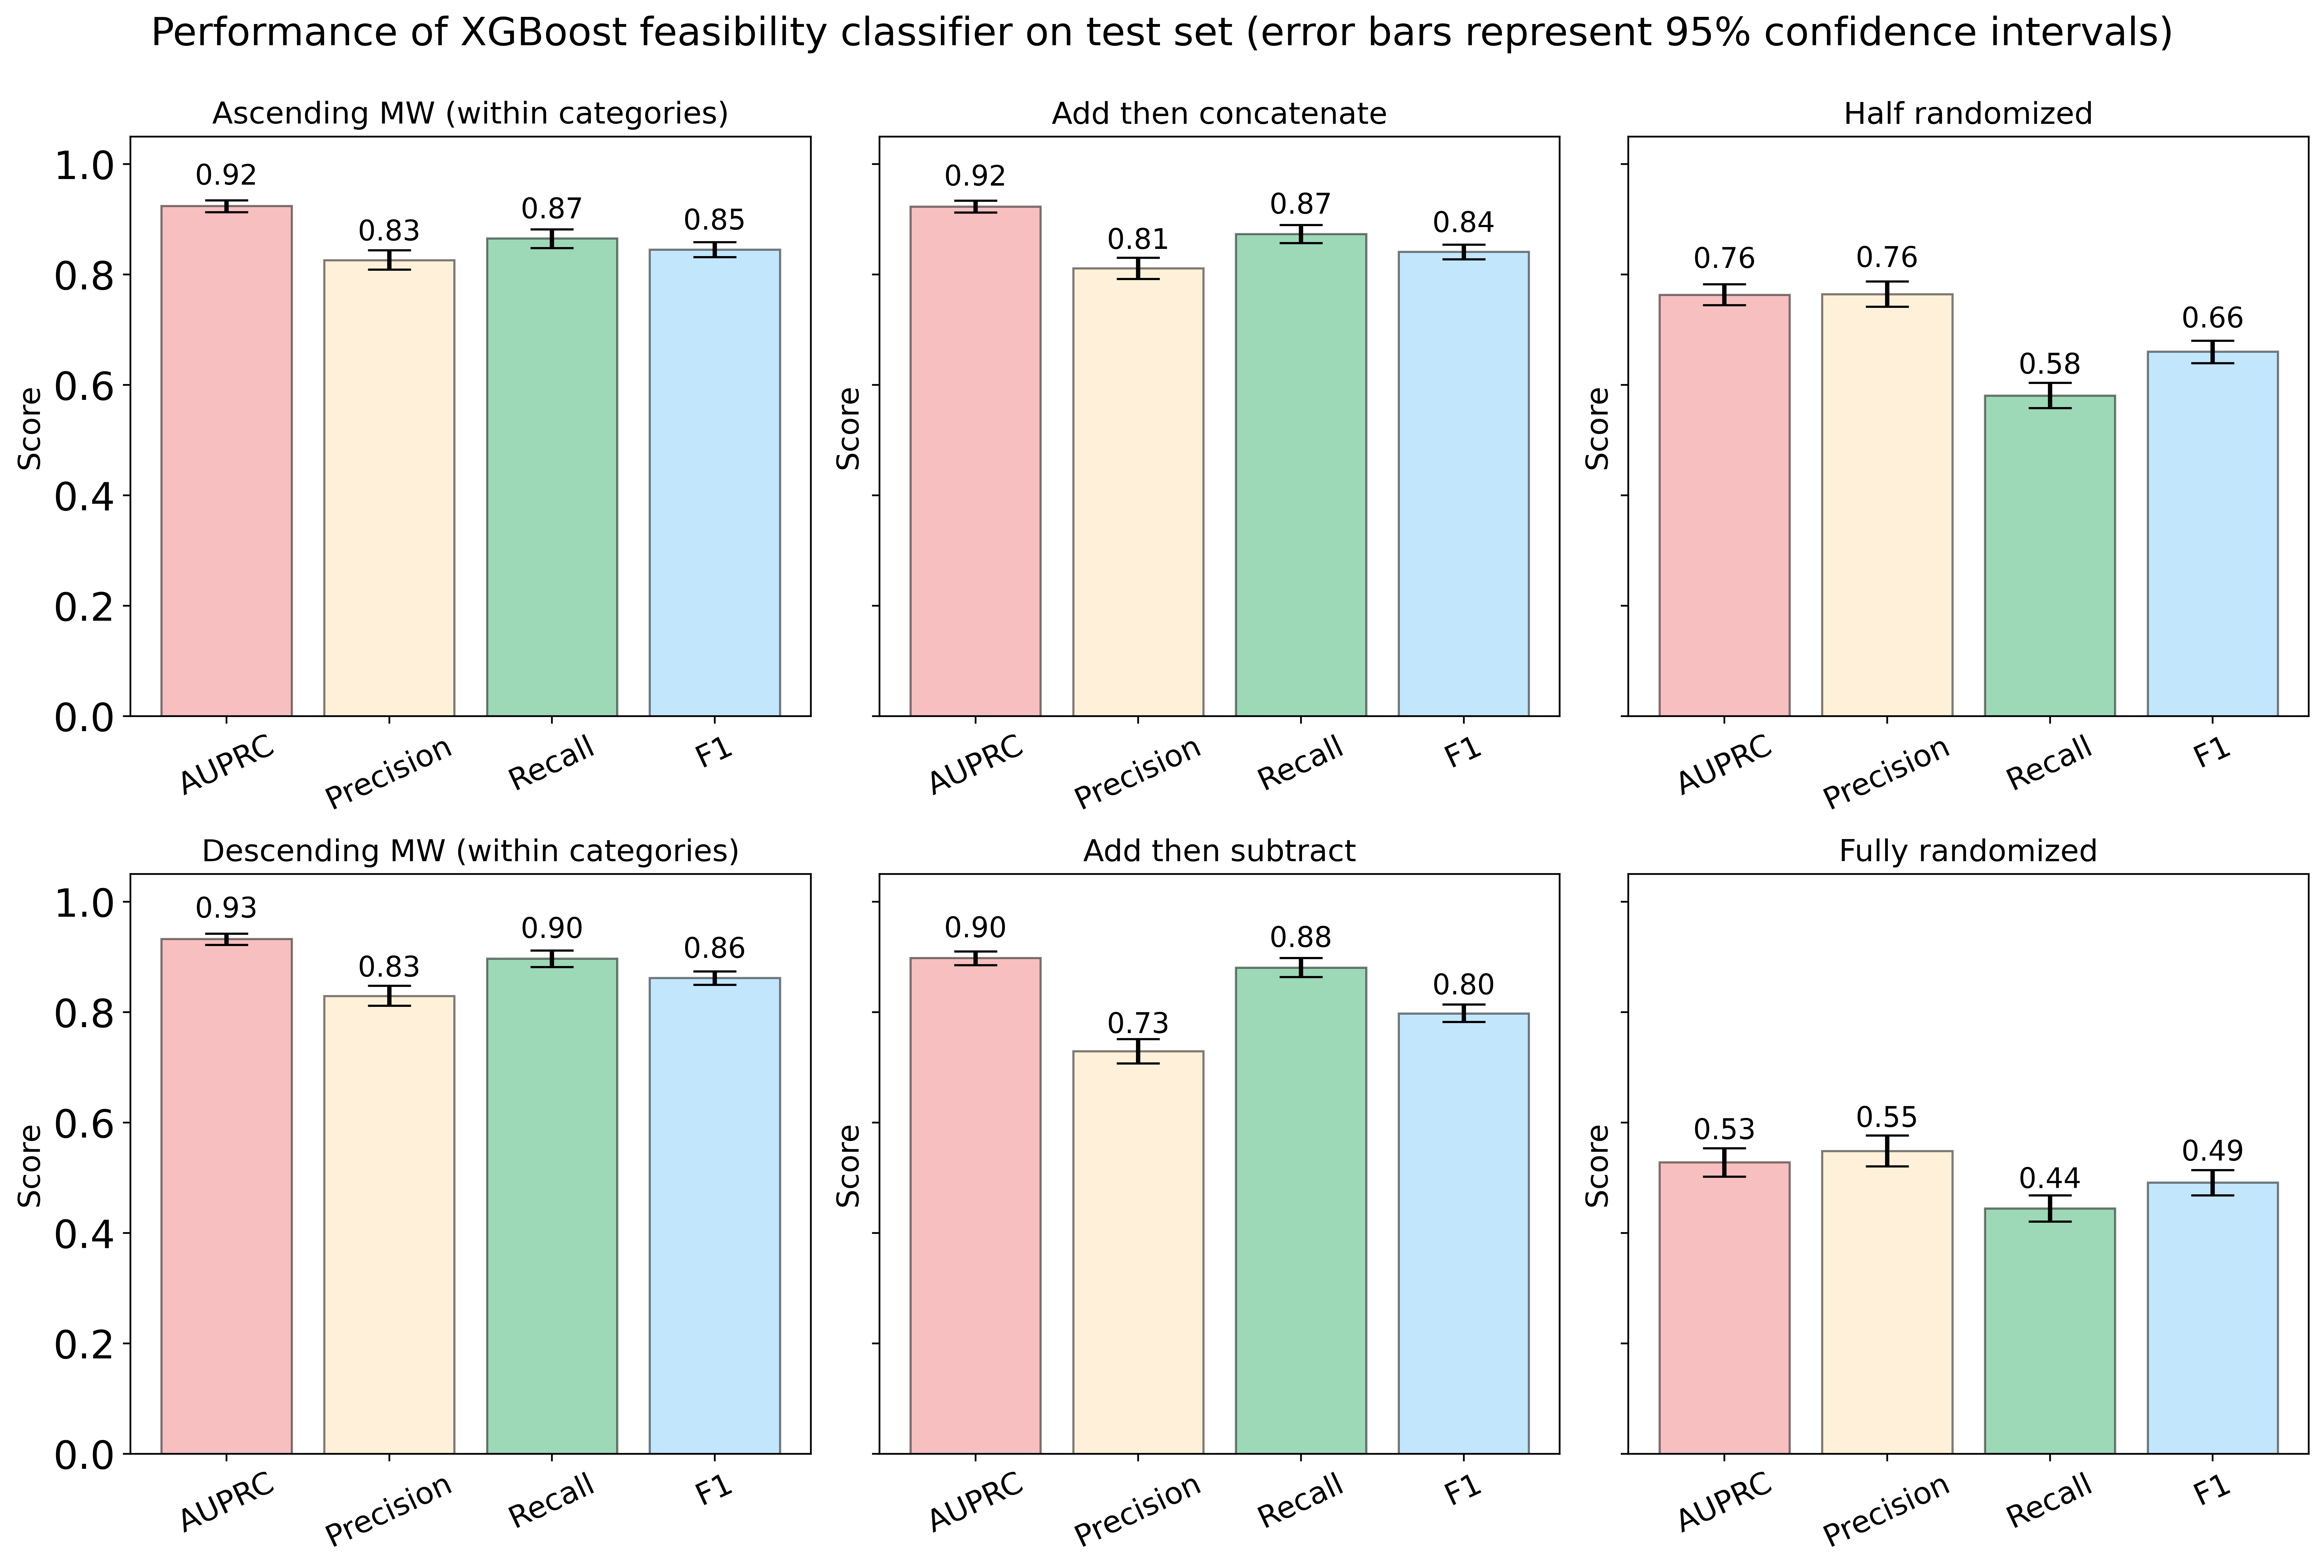

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(15,10), sharey=True)
colors = ['lightcoral', 'moccasin', 'mediumseagreen', 'lightskyblue']
labels = ['AUPRC', 'Precision', 'Recall', 'F1']

############ Ascending MW
row = 0
col = 0 
stats = {key: float(value) for key, value in DORA_XGB_by_ascending_MW_test_results_dict.items()}
cofactor_positioning_title = 'Ascending MW (within categories)'

means = [stats[f'mean {labels[0]}'],
         stats[f'mean {labels[1]}'],
         stats[f'mean {labels[2]}'],
         stats[f'mean {labels[3]}']]

lower_errors = [means[0] - stats[f'{labels[0]} lower CI'],
                means[1] - stats[f'{labels[1]} lower CI'],
                means[2] - stats[f'{labels[2]} lower CI'],
                means[3] - stats[f'{labels[3]} lower CI']]

upper_errors = [stats[f'{labels[0]} upper CI'] - means[0],
                stats[f'{labels[1]} upper CI']  - means[1],
                stats[f'{labels[2]} upper CI']  - means[2],
                stats[f'{labels[3]} upper CI']  - means[3]]


# Plot the data on the upper-left subplot
bars = axes[row, col].bar(labels, means, yerr=[lower_errors, upper_errors], 
               align='center', 
               alpha=0.5, 
               ecolor='black', 
               capsize=10,
               edgecolor = 'k',
               color = colors)

axes[row, col].set_ylabel('Score', fontsize = 14)
axes[row, col].set_title(f'{cofactor_positioning_title}', fontsize = 14)
axes[row, col].set_ylim(0,1.05)

locations = axes[row, col].get_xticks()  # Get current tick locations
axes[row, col].set_xticks(locations)  # Explicitly set tick locations
axes[row, col].set_xticklabels(labels, rotation = 25, fontsize = 14)

for bar, mean in zip(bars, means):
    height = bar.get_height()
    axes[row, col].text(bar.get_x() + bar.get_width()/2., 
                    1.03 * height,
                    '{:.2f}'.format(mean), 
                    ha = 'center', 
                    va = 'bottom',
                    fontsize = 13)
    
############ Descending MW
row = 1
col = 0
stats = {key: float(value) for key, value in DORA_XGB_by_descending_MW_test_results_dict.items()}
cofactor_positioning_title = 'Descending MW (within categories)'

means = [stats[f'mean {labels[0]}'],
         stats[f'mean {labels[1]}'],
         stats[f'mean {labels[2]}'],
         stats[f'mean {labels[3]}']]

lower_errors = [means[0] - stats[f'{labels[0]} lower CI'],
                means[1] - stats[f'{labels[1]} lower CI'],
                means[2] - stats[f'{labels[2]} lower CI'],
                means[3] - stats[f'{labels[3]} lower CI']]

upper_errors = [stats[f'{labels[0]} upper CI'] - means[0],
                stats[f'{labels[1]} upper CI']  - means[1],
                stats[f'{labels[2]} upper CI']  - means[2],
                stats[f'{labels[3]} upper CI']  - means[3]]


# Plot the data on the upper-left subplot
bars = axes[row, col].bar(labels, means, yerr=[lower_errors, upper_errors], 
               align='center', 
               alpha=0.5, 
               ecolor='black', 
               capsize=10,
               edgecolor = 'k',
               color = colors)

axes[row, col].set_ylabel('Score', fontsize = 14)
axes[row, col].set_title(f'{cofactor_positioning_title}', fontsize = 14)
axes[row, col].set_ylim(0,1.05)

locations = axes[row, col].get_xticks()  # Get current tick locations
axes[row, col].set_xticks(locations)  # Explicitly set tick locations
axes[row, col].set_xticklabels(labels, rotation = 25, fontsize = 14)

for bar, mean in zip(bars, means):
    height = bar.get_height()
    axes[row, col].text(bar.get_x() + bar.get_width()/2., 
                    1.03*height,
                    '{:.2f}'.format(mean), 
                    ha='center', 
                    va='bottom',
                    fontsize=13)
    
############ Add-concat
row = 0
col = 1
stats = {key: float(value) for key, value in DORA_XGB_add_concat_test_results_dict.items()}
cofactor_positioning_title = 'Add then concatenate'

means = [stats[f'mean {labels[0]}'],
         stats[f'mean {labels[1]}'],
         stats[f'mean {labels[2]}'],
         stats[f'mean {labels[3]}']]

lower_errors = [means[0] - stats[f'{labels[0]} lower CI'],
                means[1] - stats[f'{labels[1]} lower CI'],
                means[2] - stats[f'{labels[2]} lower CI'],
                means[3] - stats[f'{labels[3]} lower CI']]

upper_errors = [stats[f'{labels[0]} upper CI'] - means[0],
                stats[f'{labels[1]} upper CI']  - means[1],
                stats[f'{labels[2]} upper CI']  - means[2],
                stats[f'{labels[3]} upper CI']  - means[3]]


# Plot the data on the upper-left subplot
bars = axes[row, col].bar(labels, means, yerr=[lower_errors, upper_errors], 
               align='center', 
               alpha=0.5, 
               ecolor='black', 
               capsize=10,
               edgecolor = 'k',
               color = colors)

axes[row, col].set_ylabel('Score', fontsize = 14)
axes[row, col].set_title(f'{cofactor_positioning_title}', fontsize = 14)
axes[row, col].set_ylim(0,1.05)

locations = axes[row, col].get_xticks()  # Get current tick locations
axes[row, col].set_xticks(locations)  # Explicitly set tick locations
axes[row, col].set_xticklabels(labels, rotation = 25, fontsize = 14)

for bar, mean in zip(bars, means):
    height = bar.get_height()
    axes[row, col].text(bar.get_x() + bar.get_width()/2., 
                    1.03*height,
                    '{:.2f}'.format(mean), 
                    ha='center', 
                    va='bottom',
                    fontsize=13)
    
############ Add-subtract
row = 1
col = 1
stats = {key: float(value) for key, value in DORA_XGB_add_subtract_test_results_dict.items()}
cofactor_positioning_title = 'Add then subtract'

means = [stats[f'mean {labels[0]}'],
         stats[f'mean {labels[1]}'],
         stats[f'mean {labels[2]}'],
         stats[f'mean {labels[3]}']]

lower_errors = [means[0] - stats[f'{labels[0]} lower CI'],
                means[1] - stats[f'{labels[1]} lower CI'],
                means[2] - stats[f'{labels[2]} lower CI'],
                means[3] - stats[f'{labels[3]} lower CI']]

upper_errors = [stats[f'{labels[0]} upper CI'] - means[0],
                stats[f'{labels[1]} upper CI']  - means[1],
                stats[f'{labels[2]} upper CI']  - means[2],
                stats[f'{labels[3]} upper CI']  - means[3]]


# Plot the data on the upper-left subplot
bars = axes[row, col].bar(labels, means, yerr=[lower_errors, upper_errors], 
               align='center', 
               alpha=0.5, 
               ecolor='black', 
               capsize=10,
               edgecolor = 'k',
               color = colors)

axes[row, col].set_ylabel('Score', fontsize = 14)
axes[row, col].set_title(f'{cofactor_positioning_title}', fontsize = 14)
axes[row, col].set_ylim(0,1.05)

locations = axes[row, col].get_xticks()  # Get current tick locations
axes[row, col].set_xticks(locations)  # Explicitly set tick locations
axes[row, col].set_xticklabels(labels, rotation = 25, fontsize = 14)

for bar, mean in zip(bars, means):
    height = bar.get_height()
    axes[row, col].text(bar.get_x() + bar.get_width()/2., 
                    1.03*height,
                    '{:.2f}'.format(mean), 
                    ha='center', 
                    va='bottom',
                    fontsize=13)
    
############ Half random
row = 0 
col = 2
stats = {key: float(value) for key, value in DORA_XGB_half_random_test_results_dict.items()}
cofactor_positioning_title = 'Half randomized'
    
means = [stats[f'mean {labels[0]}'],
         stats[f'mean {labels[1]}'],
         stats[f'mean {labels[2]}'],
         stats[f'mean {labels[3]}']]

lower_errors = [means[0] - stats[f'{labels[0]} lower CI'],
                means[1] - stats[f'{labels[1]} lower CI'],
                means[2] - stats[f'{labels[2]} lower CI'],
                means[3] - stats[f'{labels[3]} lower CI']]

upper_errors = [stats[f'{labels[0]} upper CI'] - means[0],
                stats[f'{labels[1]} upper CI']  - means[1],
                stats[f'{labels[2]} upper CI']  - means[2],
                stats[f'{labels[3]} upper CI']  - means[3]]

# Plot the data on the upper-left subplot
bars = axes[row, col].bar(labels, means, yerr=[lower_errors, upper_errors], 
               align='center', 
               alpha=0.5, 
               ecolor='black', 
               capsize=10,
               edgecolor = 'k',
               color = colors)

axes[row, col].set_ylabel('Score', fontsize = 14)
axes[row, col].set_title(f'{cofactor_positioning_title}', fontsize = 14)
axes[row, col].set_ylim(0,1.05)

locations = axes[row, col].get_xticks()  # Get current tick locations
axes[row, col].set_xticks(locations)  # Explicitly set tick locations
axes[row, col].set_xticklabels(labels, rotation = 25, fontsize = 14)

for bar, mean in zip(bars, means):
    height = bar.get_height()
    axes[row, col].text(bar.get_x() + bar.get_width()/2., 
                    1.05*height,
                    '{:.2f}'.format(mean), 
                    ha='center', 
                    va='bottom',
                    fontsize=13)
    
############ Full random
row = 1
col = 2
stats = {key: float(value) for key, value in DORA_XGB_full_random_test_results_dict.items()}
cofactor_positioning_title = 'Fully randomized'

means = [stats[f'mean {labels[0]}'],
         stats[f'mean {labels[1]}'],
         stats[f'mean {labels[2]}'],
         stats[f'mean {labels[3]}']]

lower_errors = [means[0] - stats[f'{labels[0]} lower CI'],
                means[1] - stats[f'{labels[1]} lower CI'],
                means[2] - stats[f'{labels[2]} lower CI'],
                means[3] - stats[f'{labels[3]} lower CI']]

upper_errors = [stats[f'{labels[0]} upper CI'] - means[0],
                stats[f'{labels[1]} upper CI']  - means[1],
                stats[f'{labels[2]} upper CI']  - means[2],
                stats[f'{labels[3]} upper CI']  - means[3]]

# Plot the data on the upper-left subplot
bars = axes[row, col].bar(labels, means, yerr=[lower_errors, upper_errors], 
               align='center', 
               alpha=0.5, 
               ecolor='black', 
               capsize=10,
               edgecolor = 'k',
               color = colors)

axes[row, col].set_ylabel('Score', fontsize = 14)
axes[row, col].set_title(f'{cofactor_positioning_title}', fontsize = 14)
axes[row, col].set_ylim(0,1.05)

locations = axes[row, col].get_xticks()  # Get current tick locations
axes[row, col].set_xticks(locations)  # Explicitly set tick locations
axes[row, col].set_xticklabels(labels, rotation = 25, fontsize = 14)

for bar, mean in zip(bars, means):
    height = bar.get_height()
    axes[row, col].text(bar.get_x() + bar.get_width()/2., 
                    1.06*height,
                    '{:.2f}'.format(mean), 
                    ha='center', 
                    va='bottom',
                    fontsize=13)
    
# Display the plot
fig.suptitle("Performance of XGBoost feasibility classifier on test set (error bars represent 95% confidence intervals)",
             fontsize=18,
             y = 1.0005)

plt.savefig('all_models_metrics_on_test_set.png')
plt.tight_layout()
plt.show()

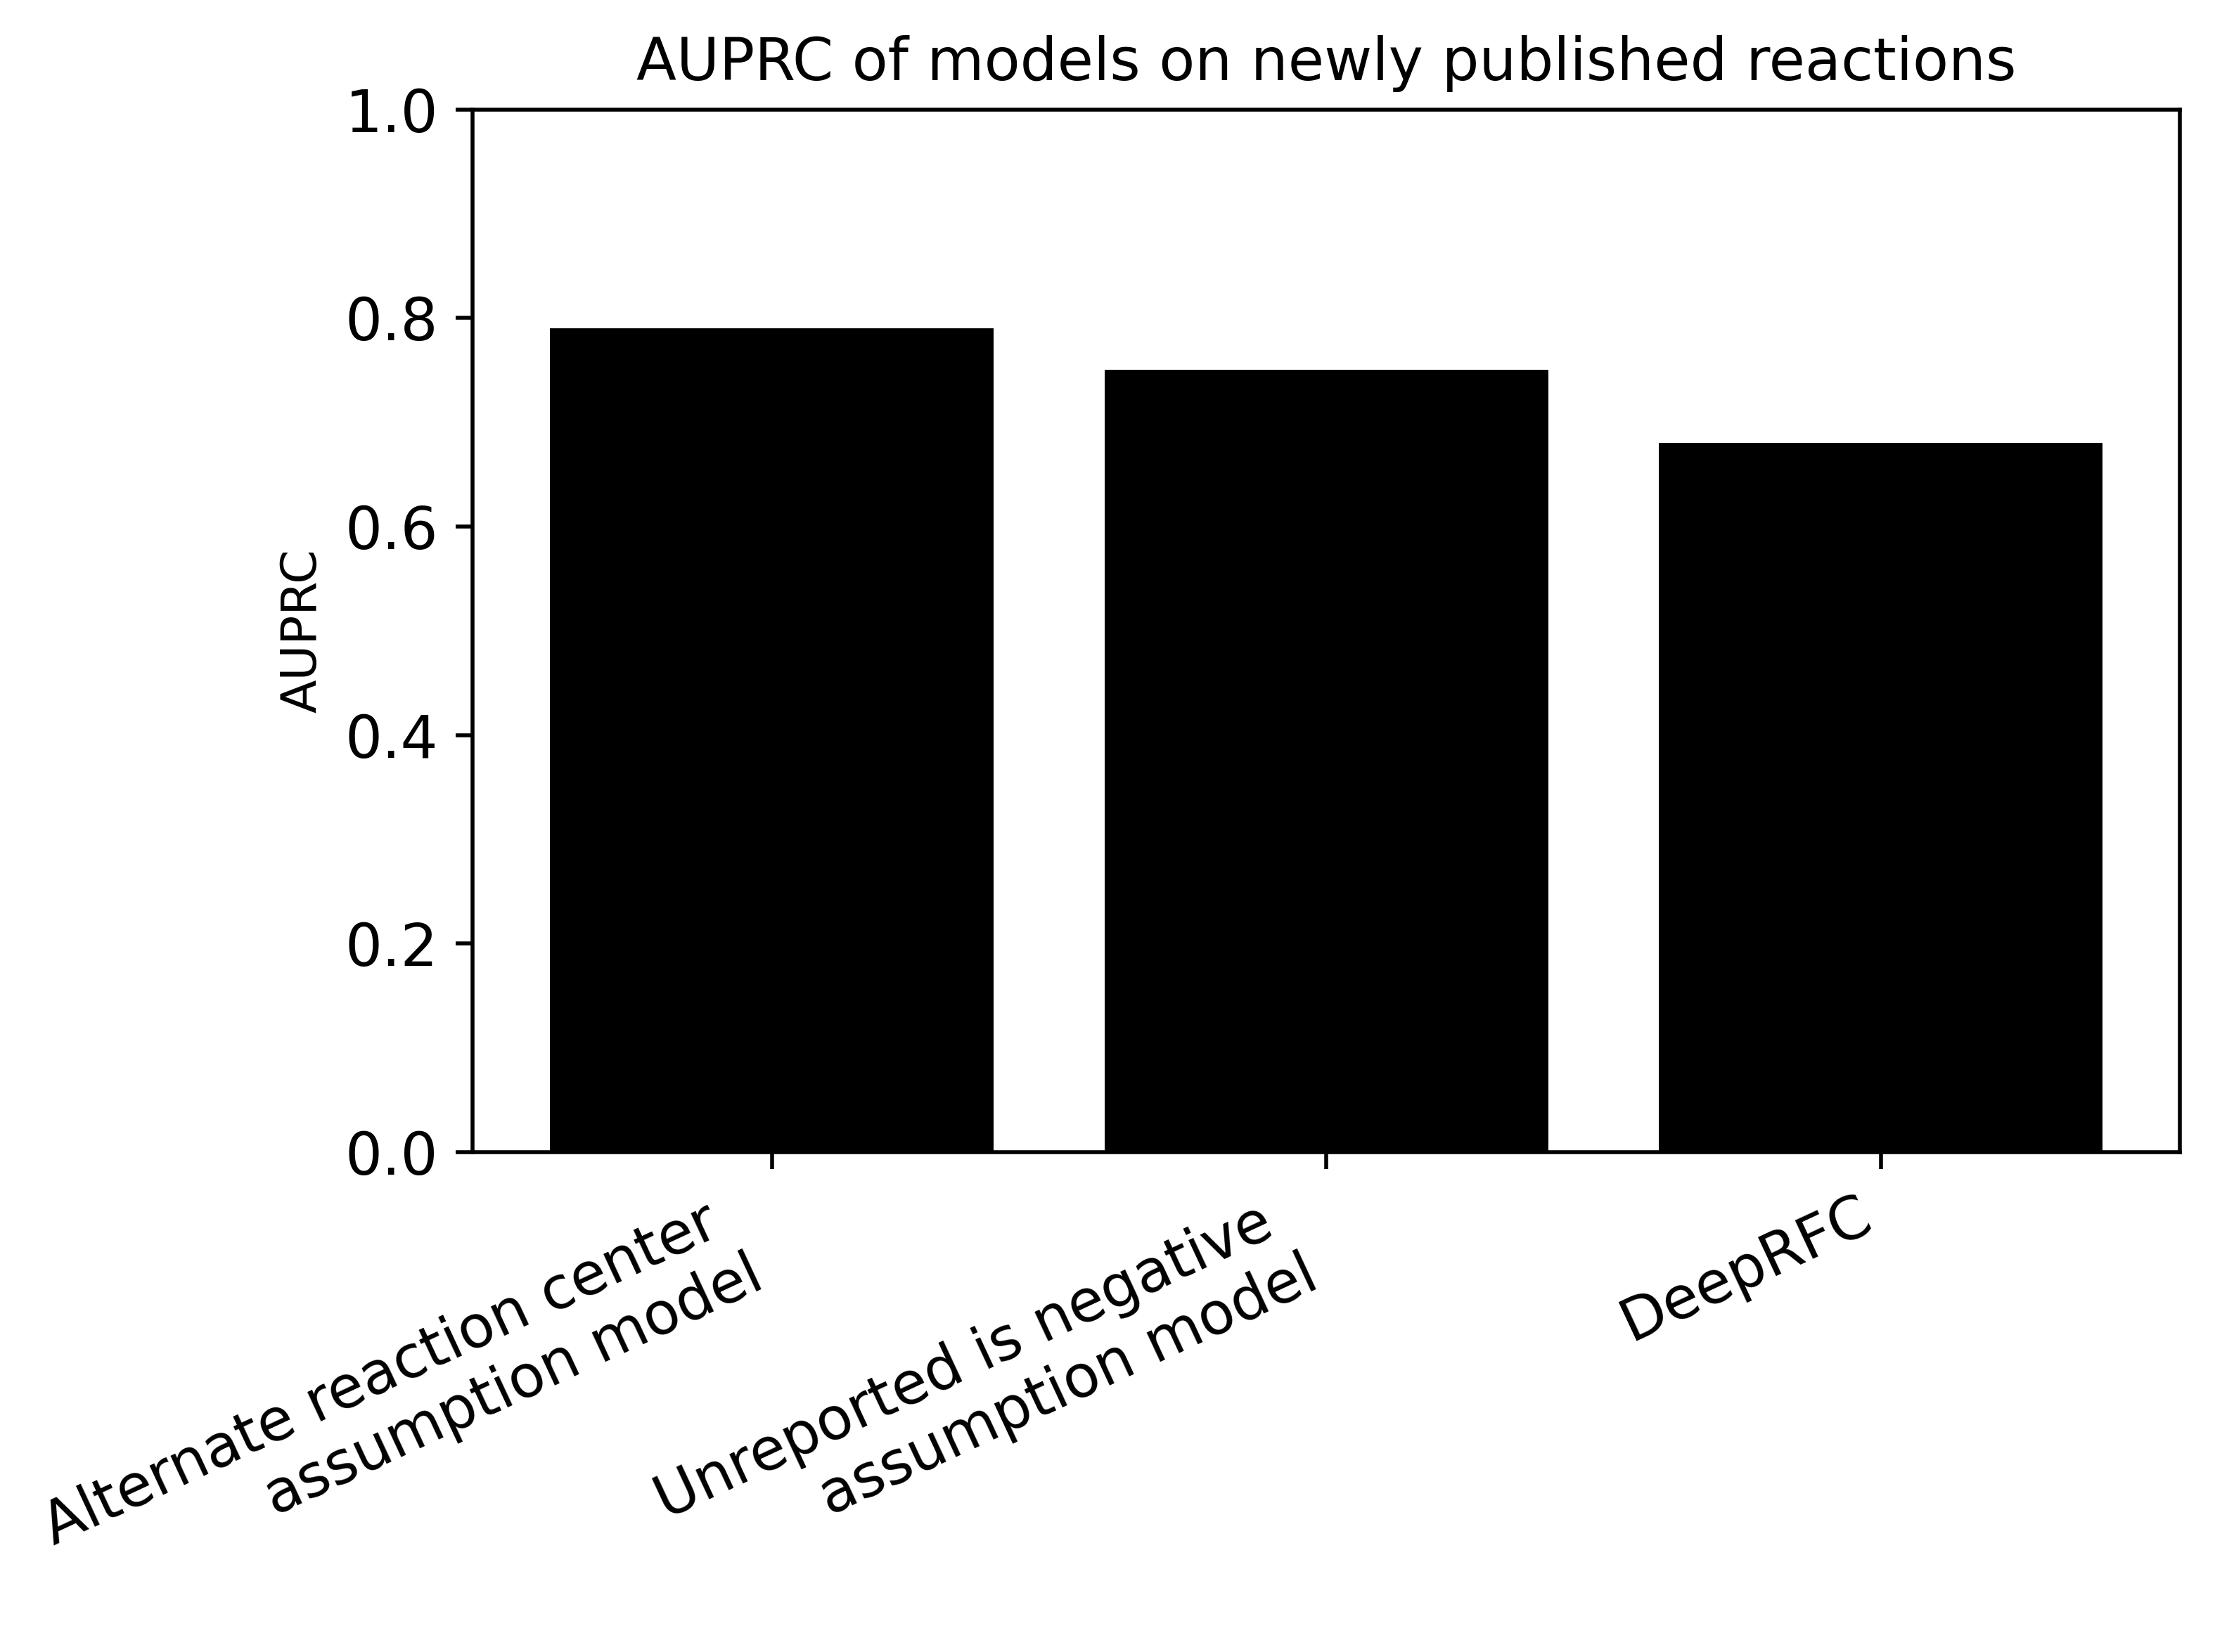

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the plot
models = ["Alternate reaction center \nassumption model", 
          "Unreported is negative \nassumption model", 
          "DeepRFC"]
auprc_scores = [0.79, 0.75, 0.68]  # Example AUPRC scores

# Plotting
fig, ax = plt.subplots()

bars = ax.bar(models, auprc_scores, color='black')

# Adding text labels on top of the bars
for bar, score in zip(bars, auprc_scores):
    height = bar.get_height()

# Rotating the x-axis labels for better readability
plt.xticks(rotation=25, ha='right')
ax.set_ylim(0, 1)

# Adding labels and title
plt.ylabel('AUPRC')
plt.title('AUPRC of models on newly published reactions')

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Show plot
plt.savefig('comparing_models.png')
plt.show()

In [9]:
benchmark_results_filepath = f'../../models/performance_results/benchmarking_rxns_ecfp4_{model_type}_{max_species}_{cofactor_configuration}_benchmarking_performance_results.json'

In [10]:
with open(benchmark_results_filepath,'r') as file:
    benchmarking_results_dict = json.load(file)

In [11]:
# correct a typo
benchmarking_results_dict['our Precision upper CI'] = benchmarking_results_dict.pop('our mean Precision upper CI')

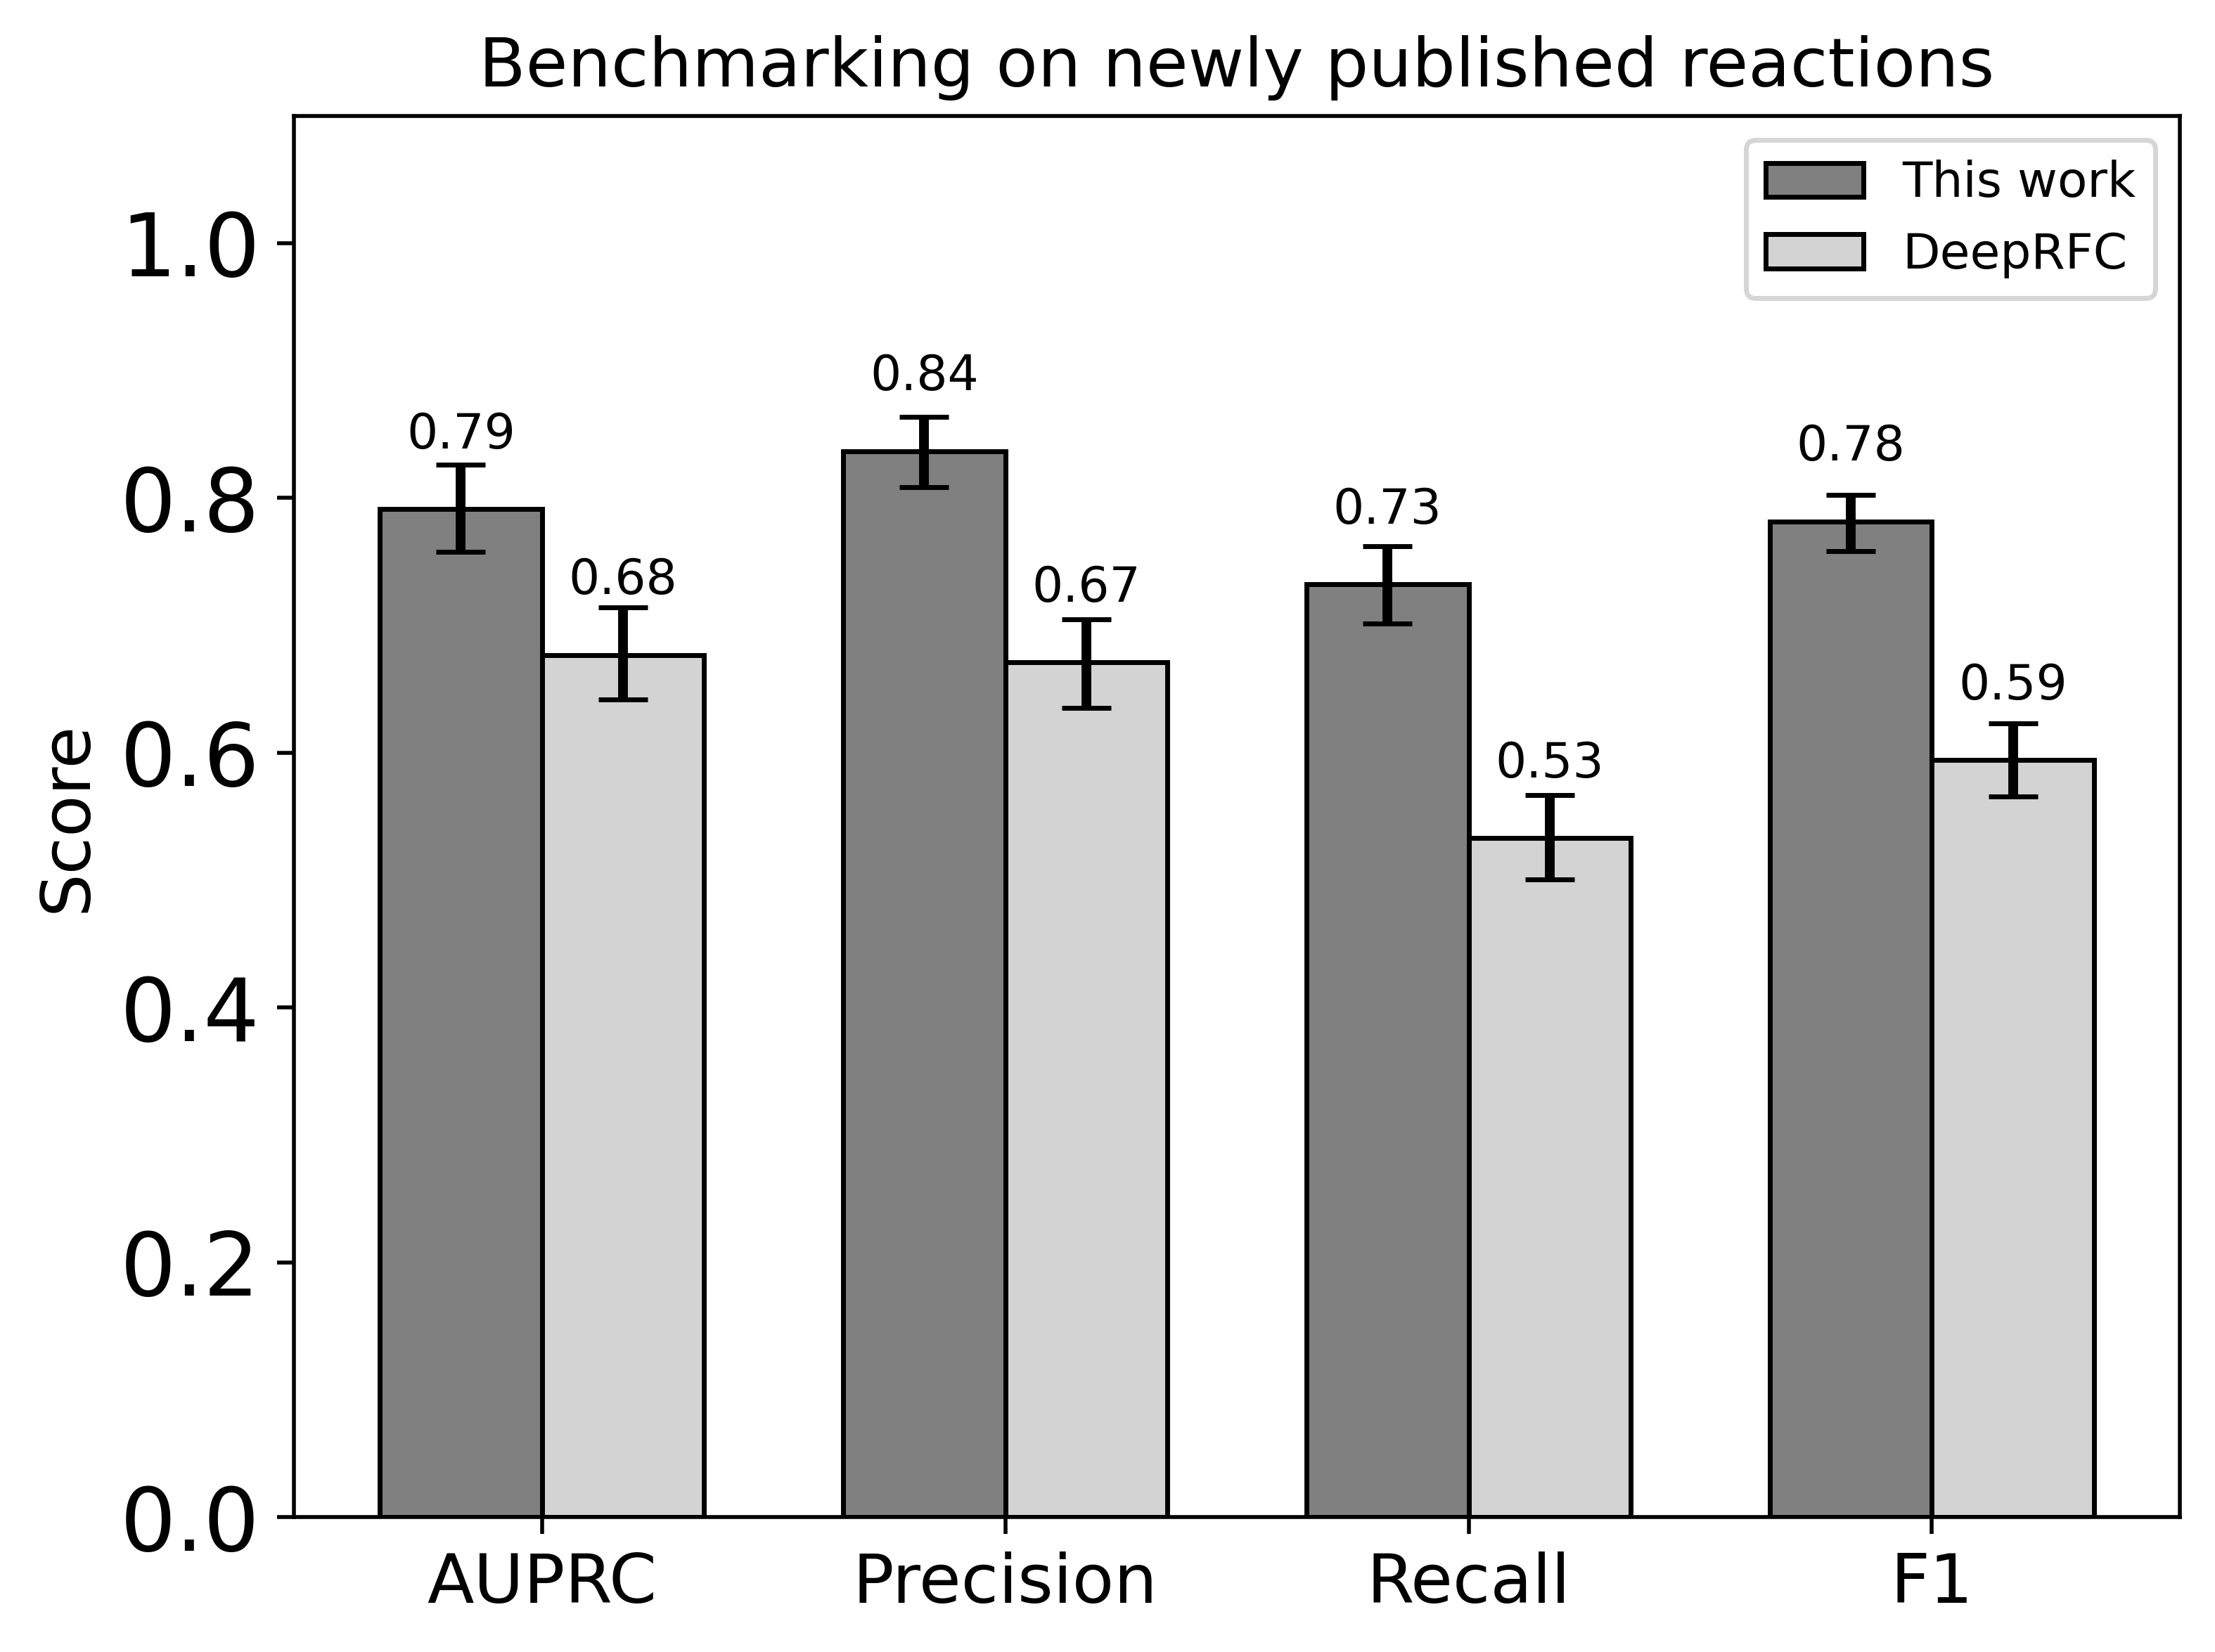

In [12]:
categories = ['AUPRC', 'Precision', 'Recall', 'F1']

# mean scores for our work vs. DeepRFC predictions
our_scores = [benchmarking_results_dict[f'our mean {cat}'] for cat in categories]
DeepRFC_scores = [benchmarking_results_dict[f'DeepRFC mean {cat}'] for cat in categories]

# error bars (upper and lower CI)
our_lower_errors = [our_scores[i] - benchmarking_results_dict[f'our {cat} lower CI'] for i, cat in enumerate(categories)]
our_upper_errors = [benchmarking_results_dict[f'our {cat} upper CI'] - our_scores[i] for i, cat in enumerate(categories)]
DeepRFC_lower_errors = [DeepRFC_scores[i] - benchmarking_results_dict[f'DeepRFC {cat} lower CI'] for i, cat in enumerate(categories)]
DeepRFC_upper_errors = [benchmarking_results_dict[f'DeepRFC {cat} upper CI'] - DeepRFC_scores[i] for i, cat in enumerate(categories)]

# combine errors for plot
our_errors = np.array([our_lower_errors, our_upper_errors])
DeepRFC_errors = np.array([DeepRFC_lower_errors, DeepRFC_upper_errors])

# X locations for the groups
x = np.arange(len(categories))
width = 0.35  # width of the bars

# Create the plot
fig, ax = plt.subplots()

# Plot bars with error bars for 'our' and 'DeepRFC'
bars1 = ax.bar(x - width/2, our_scores, width, yerr=our_errors, capsize=5, label='This work', color='gray', edgecolor='black')
bars2 = ax.bar(x + width/2, DeepRFC_scores, width, yerr=DeepRFC_errors, capsize=5, label='DeepRFC', color='lightgray', edgecolor='black')

# Add labels to the bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.04, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.04, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

ax.set_ylabel('Score', fontsize=14)
ax.set_title('Benchmarking on newly published reactions', fontsize = 14)
ax.set_ylim(0, 1.1)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=14)
ax.legend(fontsize = 10)

plt.savefig('main_fig5.png')
plt.show()